In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

from tensorflow import keras

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from pickle import dump

In [2]:
# 读取数据
dataset = pd.read_csv('D:\IPython\Corrosion-ML./Corrosion_potential.csv')

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 41 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   319 non-null    int64  
 1   Composition  319 non-null    object 
 2   Environment  319 non-null    int64  
 3   PH           319 non-null    float64
 4   [Cl-]        319 non-null    float64
 5   [SO42-]      319 non-null    float64
 6   VEC          319 non-null    float64
 7   σVEC         319 non-null    float64
 8   ΔSmix        319 non-null    float64
 9   ΔHmix        319 non-null    float64
 10  Ω            319 non-null    float64
 11  δ            319 non-null    float64
 12  rbar         319 non-null    float64
 13  Δχ           319 non-null    float64
 14  χbar         319 non-null    float64
 15  e/a          319 non-null    float64
 16  Tm           319 non-null    float64
 17  σT           319 non-null    float64
 18  Ec           319 non-null    float64
 19  Al      

In [3]:
# 去掉不必要的轴
dataset = dataset.drop('Composition', axis=1)
dataset = dataset.drop('Unnamed: 0', axis=1)


dataset.isna().sum()

Environment    0
PH             0
[Cl-]          0
[SO42-]        0
VEC            0
σVEC           0
ΔSmix          0
ΔHmix          0
Ω              0
δ              0
rbar           0
Δχ             0
χbar           0
e/a            0
Tm             0
σT             0
Ec             0
Al             0
Co             0
Cr             0
Fe             0
Ni             0
Cu             0
Ti             0
V              0
Si             0
Mn             0
Mo             0
Nb             0
Hf             0
Ta             0
Zr             0
C              0
Sn             0
P              0
B              0
W              0
Y              0
Ecorr          4
dtype: int64

In [4]:
# 去掉有空白的行
dataset = dataset.dropna()

dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 315 entries, 0 to 318
Data columns (total 39 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Environment  315 non-null    int64  
 1   PH           315 non-null    float64
 2   [Cl-]        315 non-null    float64
 3   [SO42-]      315 non-null    float64
 4   VEC          315 non-null    float64
 5   σVEC         315 non-null    float64
 6   ΔSmix        315 non-null    float64
 7   ΔHmix        315 non-null    float64
 8   Ω            315 non-null    float64
 9   δ            315 non-null    float64
 10  rbar         315 non-null    float64
 11  Δχ           315 non-null    float64
 12  χbar         315 non-null    float64
 13  e/a          315 non-null    float64
 14  Tm           315 non-null    float64
 15  σT           315 non-null    float64
 16  Ec           315 non-null    float64
 17  Al           315 non-null    float64
 18  Co           315 non-null    float64
 19  Cr      

In [5]:
from sklearn.model_selection import train_test_split


# 将数据分成X和y
y = dataset['Ecorr']
X = dataset.drop(['Ecorr'], axis=1)

# Pearson Correlation Analysis

# 仅经验参数和环境因素

<Figure size 1000x800 with 0 Axes>

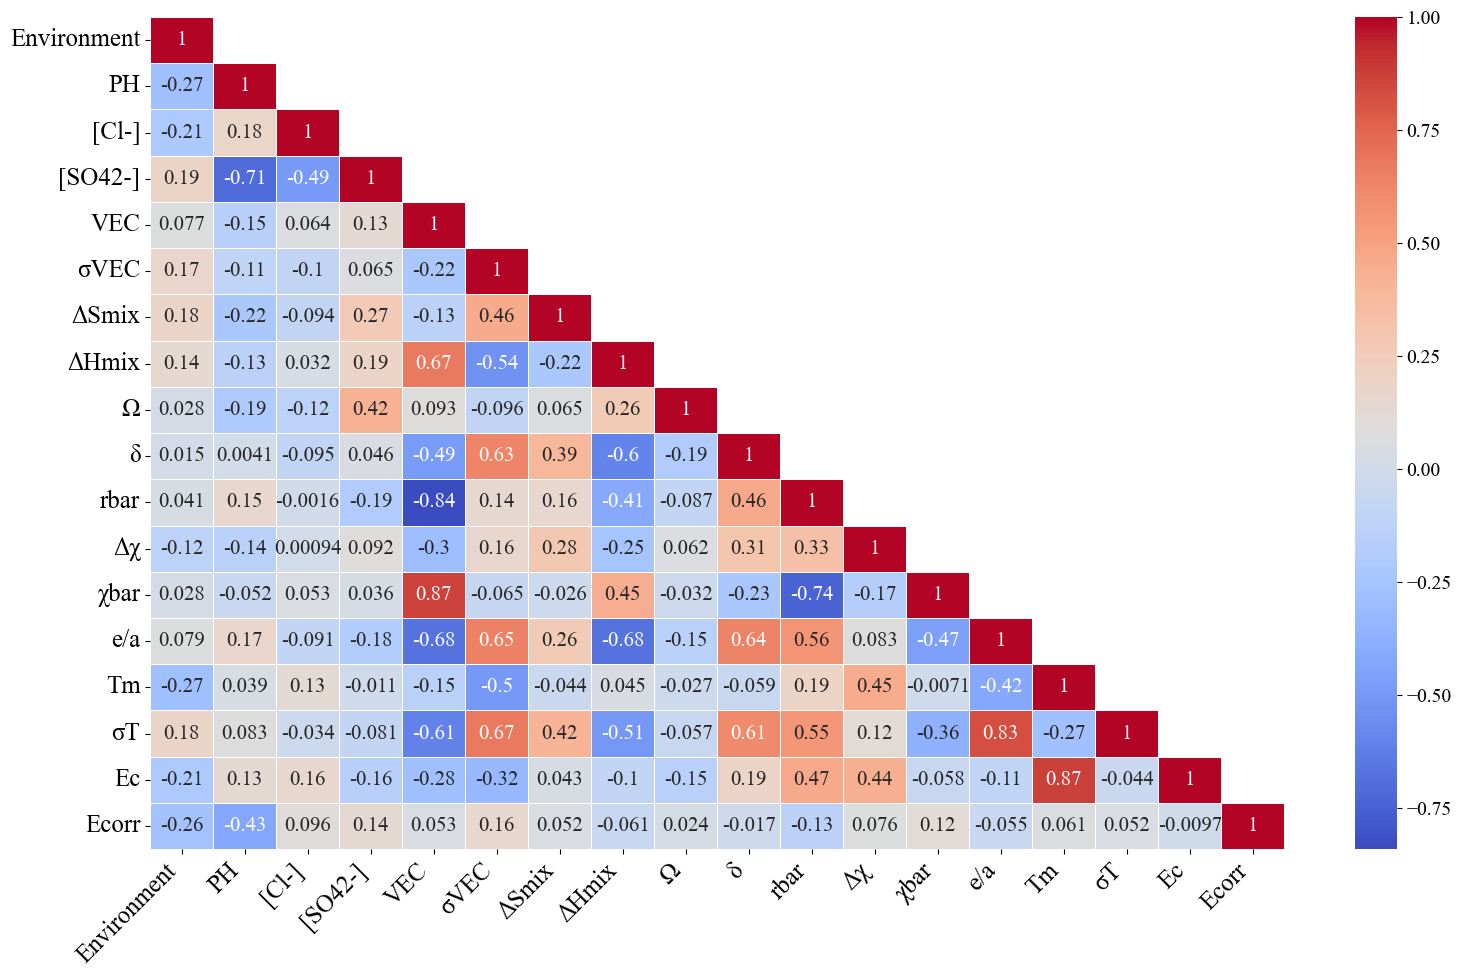

In [6]:
# 生成Pearson相关系数矩阵
P = dataset[['Environment', 'PH', '[Cl-]', '[SO42-]', 'VEC', 'σVEC', 'ΔSmix', 'ΔHmix', 'Ω', 'δ', 'rbar', 'Δχ', 'χbar', 'e/a', 'Tm', 'σT', 'Ec', 'Ecorr']]
corr=P.corr(method='pearson')

# 设置图像大小、字体大小、字体类型
fig = plt.figure(figsize=(10, 8))
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14

# 生成一个和相关系数矩阵相同大小的矩阵，并把它的主对角线上的元素设为1
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
mask[np.diag_indices_from(mask)] = False

# 绘制相关系数矩阵的热力图
plt.figure(figsize=(16,10))
sns.heatmap(corr,annot=True,cmap='coolwarm', linewidths=0.5, annot_kws={"size": 15}, mask=mask)

plt.xticks(rotation=45, ha='right', fontsize=18)
plt.yticks(rotation=0, fontsize=18)

plt.tight_layout()
plt.show()

In [7]:
# 根据相关系数选择特征
threshold = 0.8  # 设置相关系数阈值
high_corr = np.where(abs(corr) > threshold)
high_corr = [(corr.index[x], corr.columns[y]) for x, y in zip(*high_corr) if x != y and x < y]
print('Highly correlated features:', high_corr)

Highly correlated features: [('VEC', 'rbar'), ('VEC', 'χbar'), ('e/a', 'σT'), ('Tm', 'Ec')]


In [8]:
# 根据Pearson相关性分析结果，剔除一些特征参数
dataset = dataset.drop('VEC', axis=1)
dataset = dataset.drop('σT', axis=1)
dataset = dataset.drop('Ec', axis=1)

# 仅包含成分

<Figure size 1000x800 with 0 Axes>

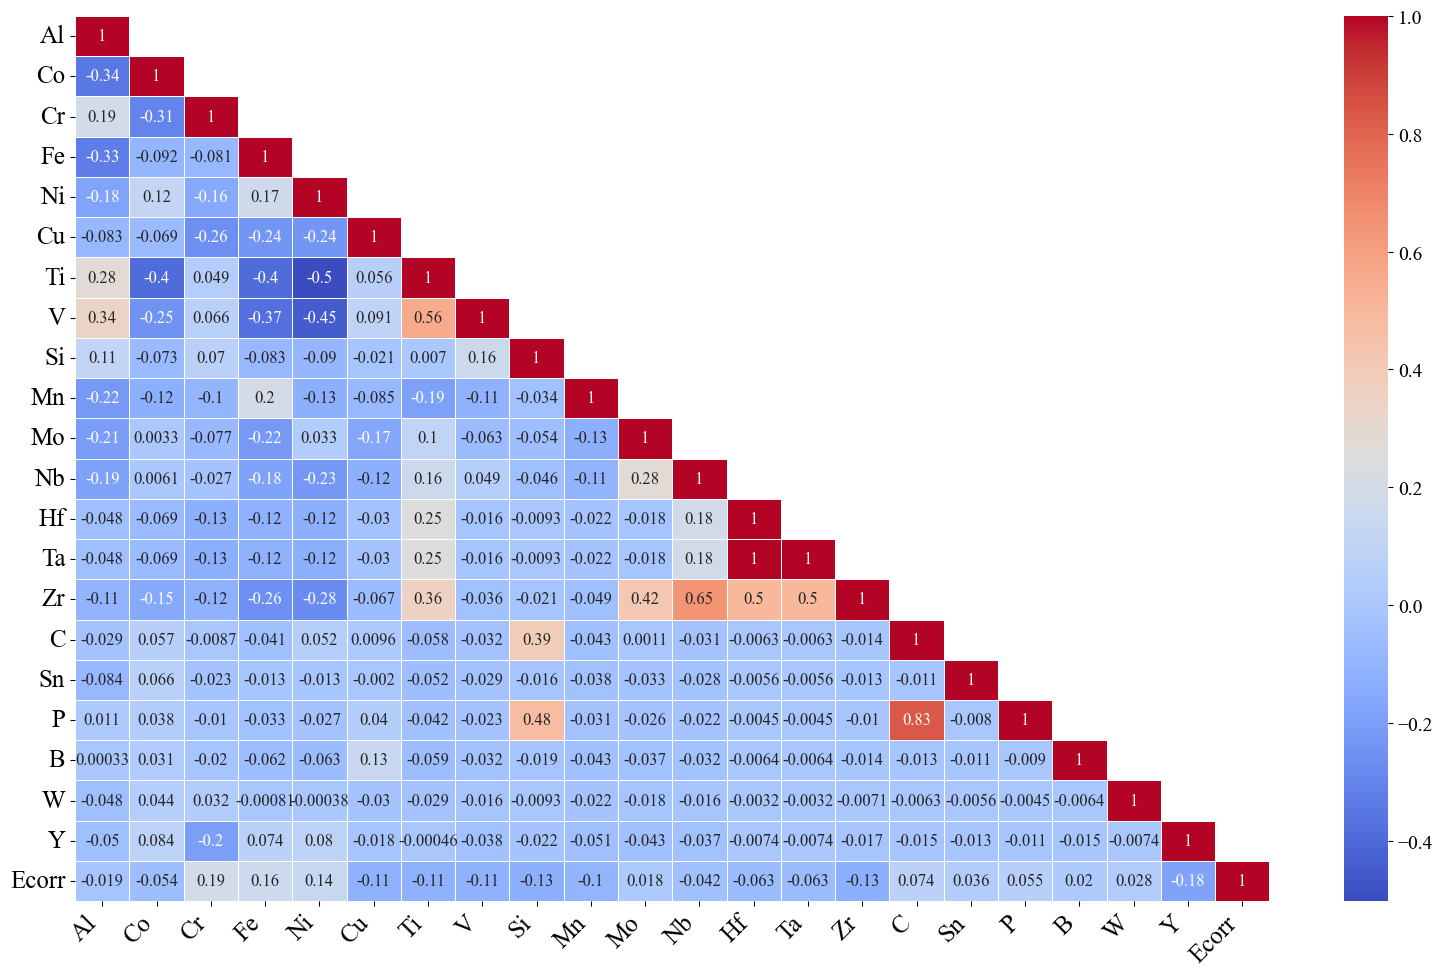

In [9]:
# 生成Pearson相关系数矩阵
P = dataset[['Al', 'Co', 'Cr', 'Fe', 'Ni', 'Cu', 'Ti', 'V', 'Si', 'Mn', 'Mo', 'Nb', 'Hf', 'Ta', 'Zr', 'C', 'Sn', 'P', 'B', 'W', 'Y', 'Ecorr']]
corr=P.corr(method='pearson')

# 设置图像大小、字体大小、字体类型
fig = plt.figure(figsize=(10, 8))
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14

# 生成一个和相关系数矩阵相同大小的矩阵，并把它的主对角线上的元素设为1
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
mask[np.diag_indices_from(mask)] = False

# 绘制相关系数矩阵的热力图
plt.figure(figsize=(16,10))
sns.heatmap(corr,annot=True,cmap='coolwarm', linewidths=0.5, annot_kws={"size": 12}, mask=mask)

plt.xticks(rotation=45, ha='right', fontsize=18)
plt.yticks(rotation=0, fontsize=18)

plt.tight_layout()
plt.show()

In [10]:
# 根据相关系数选择特征
threshold = 0.8  # 设置相关系数阈值
high_corr = np.where(abs(corr) > threshold)
high_corr = [(corr.index[x], corr.columns[y]) for x, y in zip(*high_corr) if x != y and x < y]
print('Highly correlated features:', high_corr)

Highly correlated features: [('Hf', 'Ta'), ('C', 'P')]


In [11]:
# 根据Pearson相关性分析结果，剔除一些特征参数
dataset = dataset.drop('Hf', axis=1)
dataset = dataset.drop('Ta', axis=1)
dataset = dataset.drop('P', axis=1)

# 随机森林模型特征重要性分析

In [12]:
from sklearn.model_selection import train_test_split


# 将数据分成X和y轴
y = dataset['Ecorr']
X = dataset.drop(['Ecorr'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size= 0.2, 
                                                    random_state=150,
                                                    )

# 归一化
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

各特征的重要性分布： [1.70672953e-02 3.22380062e-01 4.49003870e-02 4.39110838e-03
 5.58669117e-02 2.12869069e-02 2.99544607e-02 1.68798009e-02
 2.23257020e-02 1.70184941e-02 2.92199755e-02 5.14150537e-02
 3.60418181e-02 6.87273554e-02 1.91255466e-02 6.14033749e-02
 3.74263322e-02 2.24300784e-02 1.93169050e-02 4.45497486e-03
 6.22889939e-03 1.44214887e-03 2.55549444e-03 1.14840085e-02
 6.91484835e-03 1.16804706e-02 3.60221849e-05 9.30666135e-04
 2.16340280e-04 2.01749373e-06 1.46778605e-04 5.67297610e-02]


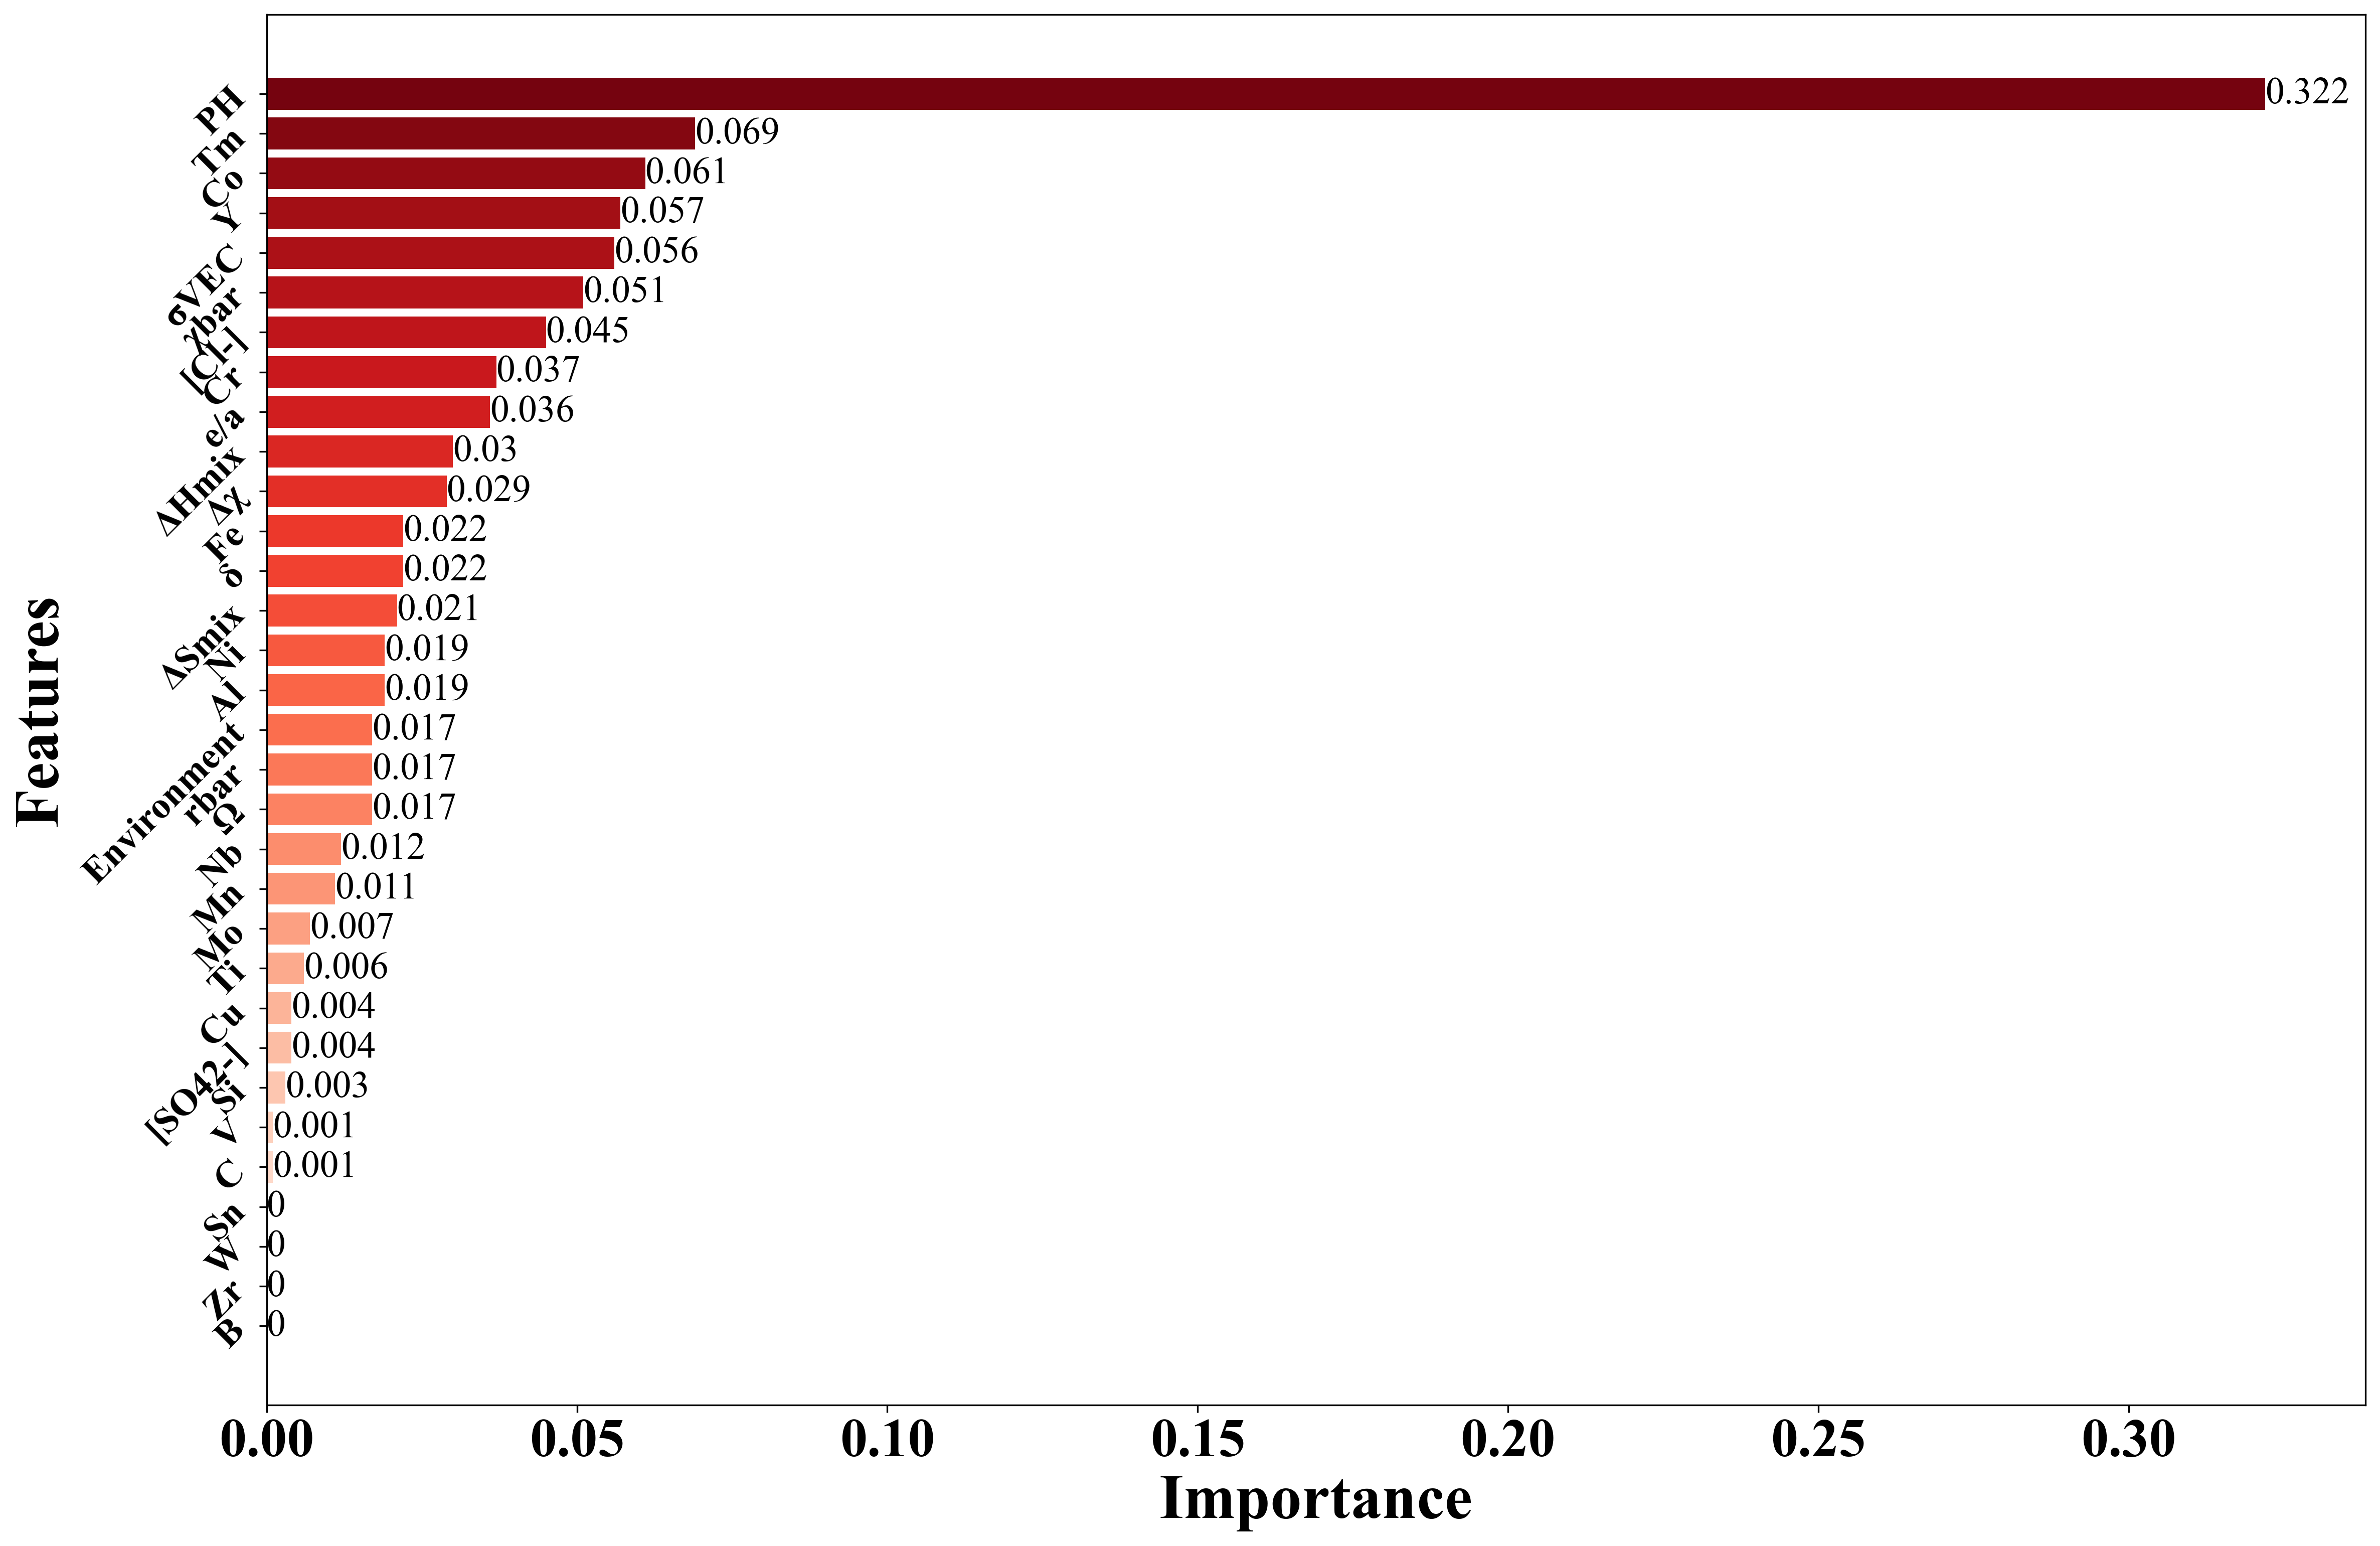

In [13]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt


# 获取输入特征的名称
feature_names = dataset.columns[:-1]

rf = RandomForestRegressor()                               # 创建随机森林回归模型
c = rf.fit(X_train, y_train).feature_importances_    # 特征重要性
print("各特征的重要性分布：",c)

importances=pd.DataFrame(c,columns=['importance'])
feature_data=pd.DataFrame(feature_names,columns=['feature'])
importance=pd.concat([feature_data,importances],axis=1)
importance=importance.sort_values(['importance'],ascending=True)
values=np.around(importance['importance'].values,decimals=3)

# 创建红色渐变色调色板
red_palette = sns.color_palette("Reds", len(importance))

plt.figure(figsize=(18,12), dpi=300)
p1=plt.barh(importance['feature'],values,color=red_palette,label='values')
plt.bar_label(p1, label_type='edge',fontproperties={'family':'Times New Roman', 'weight':'normal', 'size':18})

plt.xlabel('Importance',fontproperties={'family':'Times New Roman', 'weight':'bold', 'size':30})
plt.ylabel('Features',fontproperties={'family':'Times New Roman', 'weight':'bold', 'size':30})

plt.xticks(fontproperties={'family':'Times New Roman', 'weight':'bold', 'size':26})
plt.yticks(fontproperties={'family':'Times New Roman', 'weight':'bold', 'size':18}, rotation=45)

# 移除图例
plt.legend().remove()
# plt.savefig("importance.png", dpi=300,format="png")
plt.show()

In [14]:
# 根据特征重要性分析结果，剔除一些特征参数
dataset = dataset.drop('Zr', axis=1)
dataset = dataset.drop('B', axis=1)
dataset = dataset.drop('C', axis=1)
dataset = dataset.drop('W', axis=1)
dataset = dataset.drop('V', axis=1)
dataset = dataset.drop('Si', axis=1)
dataset = dataset.drop('Sn', axis=1)

In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 315 entries, 0 to 318
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Environment  315 non-null    int64  
 1   PH           315 non-null    float64
 2   [Cl-]        315 non-null    float64
 3   [SO42-]      315 non-null    float64
 4   σVEC         315 non-null    float64
 5   ΔSmix        315 non-null    float64
 6   ΔHmix        315 non-null    float64
 7   Ω            315 non-null    float64
 8   δ            315 non-null    float64
 9   rbar         315 non-null    float64
 10  Δχ           315 non-null    float64
 11  χbar         315 non-null    float64
 12  e/a          315 non-null    float64
 13  Tm           315 non-null    float64
 14  Al           315 non-null    float64
 15  Co           315 non-null    float64
 16  Cr           315 non-null    float64
 17  Fe           315 non-null    float64
 18  Ni           315 non-null    float64
 19  Cu      

# 对筛选后的所有特征再进行一次Pearson相关性分析

<Figure size 1000x800 with 0 Axes>

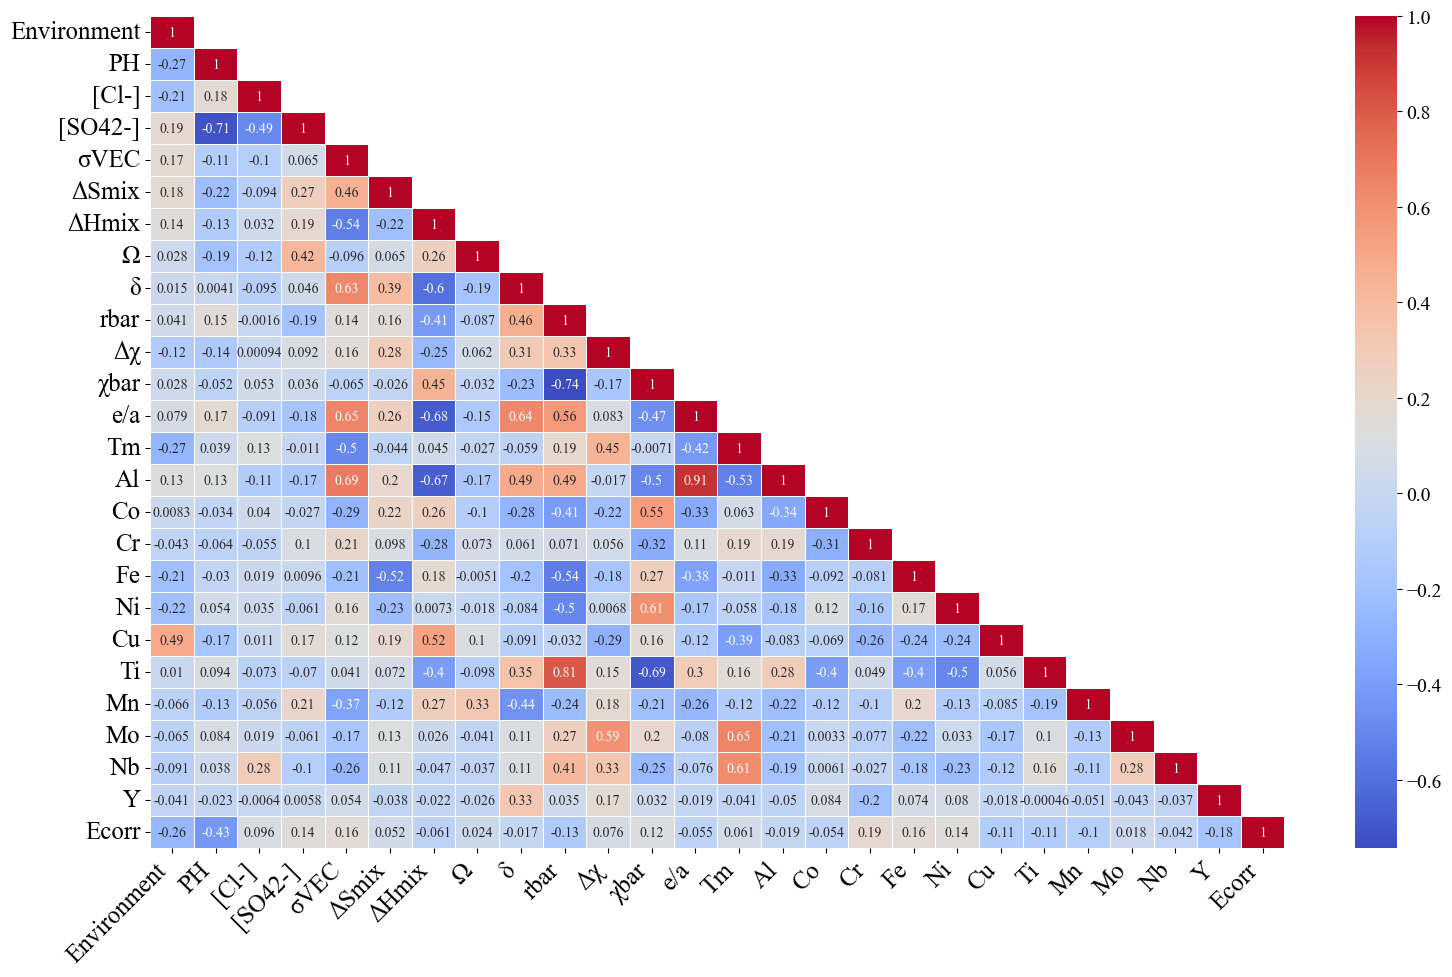

In [16]:
# 生成Pearson相关系数矩阵
P = dataset[['Environment', 'PH', '[Cl-]', '[SO42-]', 'σVEC', 'ΔSmix', 'ΔHmix', 'Ω', 'δ', 'rbar', 'Δχ', 'χbar', 'e/a', 'Tm', 'Al', 'Co', 
             'Cr', 'Fe', 'Ni', 'Cu', 'Ti', 'Mn', 'Mo', 'Nb', 'Y', 'Ecorr']]
corr=P.corr(method='pearson')

# 设置图像大小、字体大小、字体类型
fig = plt.figure(figsize=(10, 8))
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14

# 生成一个和相关系数矩阵相同大小的矩阵，并把它的主对角线上的元素设为1
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
mask[np.diag_indices_from(mask)] = False

# 绘制相关系数矩阵的热力图
plt.figure(figsize=(16,10))
sns.heatmap(corr,annot=True,cmap='coolwarm', linewidths=0.5, annot_kws={"size": 10}, mask=mask)

plt.xticks(rotation=45, ha='right', fontsize=18)
plt.yticks(rotation=0, fontsize=18)

plt.tight_layout()
plt.show()

In [17]:
# 根据相关系数选择特征
threshold = 0.8  # 设置相关系数阈值
high_corr = np.where(abs(corr) > threshold)
high_corr = [(corr.index[x], corr.columns[y]) for x, y in zip(*high_corr) if x != y and x < y]
print('Highly correlated features:', high_corr)

Highly correlated features: [('rbar', 'Ti'), ('e/a', 'Al')]


In [18]:
# 根据Pearson相关性分析结果，剔除一些特征参数
dataset = dataset.drop('Ti', axis=1)
dataset = dataset.drop('Al', axis=1)

# 递归消除法

In [19]:
from sklearn.model_selection import train_test_split


# 将数据分成X和y轴
y = dataset['Ecorr']
X = dataset.drop(['Ecorr'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size= 0.2, 
                                                    random_state=150,
                                                    )

# 归一化
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [20]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 315 entries, 0 to 318
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Environment  315 non-null    int64  
 1   PH           315 non-null    float64
 2   [Cl-]        315 non-null    float64
 3   [SO42-]      315 non-null    float64
 4   σVEC         315 non-null    float64
 5   ΔSmix        315 non-null    float64
 6   ΔHmix        315 non-null    float64
 7   Ω            315 non-null    float64
 8   δ            315 non-null    float64
 9   rbar         315 non-null    float64
 10  Δχ           315 non-null    float64
 11  χbar         315 non-null    float64
 12  e/a          315 non-null    float64
 13  Tm           315 non-null    float64
 14  Co           315 non-null    float64
 15  Cr           315 non-null    float64
 16  Fe           315 non-null    float64
 17  Ni           315 non-null    float64
 18  Cu           315 non-null    float64
 19  Mn      

In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score


estimator = RandomForestRegressor()                               # 随机森林

print("递归特征消除法筛选最优特征组合")
score = []                                                            # 建立列表
for i in range(1, 24, 1):
    selector = RFE(estimator, n_features_to_select=i,step=1)
    selector = selector.fit(X_train, y_train) # 最优特征
    # 哪些特征入选最后特征，true表示入选
    print(selector.support_)
    # 每个特征的得分排名，特征得分越低（1最好），表示特征越好
    print(selector.ranking_)
    #  挑选了几个特征
    print(selector.n_features_)
    once = -cross_val_score(estimator,selector.fit_transform(X_train, y_train), y_train, cv=5, scoring='neg_mean_squared_error').mean()                      # 交叉验证
    score.append(once)                                                           # 交叉验证结果保存到列表
print(min(score), (score.index(min(score))*1)+1)               # 输出最优分类结果和对应的特征数量
print(score)

递归特征消除法筛选最优特征组合
[False False False False  True False False False False False False False
 False False False False False False False False False False False]
[18  2  9 22  1 13  7 15 12 17 10  6  4  3  5  8 14 16 23 20 21 19 11]
1
[False  True False False  True False False False False False False False
 False False False False False False False False False False False]
[17  1  9 22  1 11  7 14 12 16  6  5  3  2  4 10 13 15 20 19 21 18  8]
2
[False  True False False False False False False False False False False
  True  True False False False False False False False False False]
[16  1  7 21  4 10  9 12 11 15  5  3  1  1  2  6 13 14 20 18 19 17  8]
3
[False  True False False  True False False False False False False False
  True  True False False False False False False False False False]
[14  1  6 20  1 10  4 12  9 15  8  3  1  1  2  5 11 13 19 16 18 17  7]
4
[False  True False False  True False False False False False False False
  True  True  True False False False False False False 

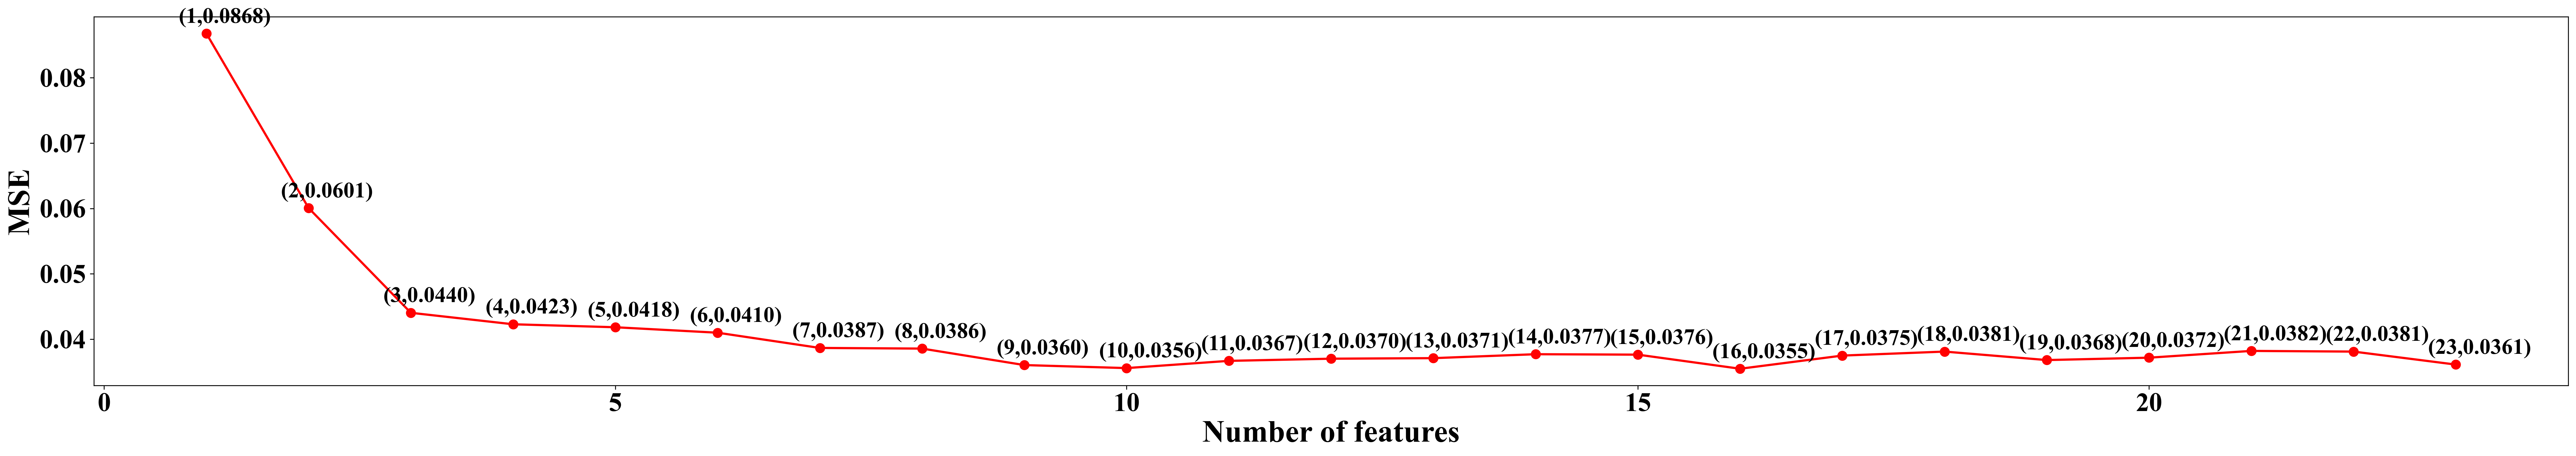

In [24]:
plt.figure(figsize=[40, 6], dpi=300)
plt.plot(range(1, 24, 1), score, marker='o', color='red', linewidth=2, markersize=8)

plt.xlabel('Number of features',fontproperties={'family':'Times New Roman', 'weight':'bold', 'size':28})
plt.ylabel('MSE',fontproperties={'family':'Times New Roman', 'weight':'bold', 'size':28})

for xy in zip(range(1, 24, 1), score):
    plt.annotate("(%s,%.4f)" % xy, xy=xy, xytext=(-25, 10),textcoords='offset points',weight='bold',fontproperties={'family':'Times New Roman', 'weight':'bold', 'size':20})

plt.xticks(fontproperties={'family':'Times New Roman', 'weight':'bold', 'size':24})
plt.yticks(fontproperties={'family':'Times New Roman', 'weight':'bold', 'size':24})

plt.show()

In [25]:
# 根据递归消除法结果，剔除一些特征参数
dataset = dataset.drop('[SO42-]', axis=1)
dataset = dataset.drop('ΔSmix', axis=1)
dataset = dataset.drop('Ω', axis=1)
dataset = dataset.drop('δ', axis=1)
dataset = dataset.drop('rbar', axis=1)
dataset = dataset.drop('Δχ', axis=1)
dataset = dataset.drop('Fe', axis=1)
dataset = dataset.drop('Ni', axis=1)
dataset = dataset.drop('Cu', axis=1)
dataset = dataset.drop('Mn', axis=1)
dataset = dataset.drop('Mo', axis=1)
dataset = dataset.drop('Nb', axis=1)

In [26]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 315 entries, 0 to 318
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Environment  315 non-null    int64  
 1   PH           315 non-null    float64
 2   [Cl-]        315 non-null    float64
 3   σVEC         315 non-null    float64
 4   ΔHmix        315 non-null    float64
 5   χbar         315 non-null    float64
 6   e/a          315 non-null    float64
 7   Tm           315 non-null    float64
 8   Co           315 non-null    float64
 9   Cr           315 non-null    float64
 10  Y            315 non-null    float64
 11  Ecorr        315 non-null    float64
dtypes: float64(11), int64(1)
memory usage: 32.0 KB
